# Exploary data analysis

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os 
import warnings

In [2]:
data = pd.read_csv("C:\\Users\\Nandhavena Navignan\\Downloads\\Project\\EV_Customer_Feedback.csv")

In [3]:
data

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,Scooty is ok but 250 motor power is less. So t...,Daily Commute,> 1 yr,< 5000 kms,2,2.0,2.0,NaN,2.0,NaN,2.0,NaN,3.0,Gemopai Ryder
840,"Superb scooty. good look, Many color options ....",Everything,< 3 months,< 5000 kms,5,5.0,5.0,5.0,5.0,5.0,NaN,5.0,NaN,Gemopai Ryder
841,"Up to 2 years the condition was good,\nAfter 2...",Daily Commute,> 1 yr,5000-10000 kms,2,2.0,2.0,4.0,2.0,3.0,NaN,1.0,NaN,Gemopai Ryder
842,"Compare to other scooters it is a best bike, c...",Daily Commute,3-6 months,< 5000 kms,5,4.0,4.0,NaN,NaN,NaN,4.0,NaN,5.0,Gemopai Ryder


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   review              797 non-null    object 
 1   Used it for         844 non-null    object 
 2   Owned for           844 non-null    object 
 3   Ridden for          668 non-null    object 
 4   rating              844 non-null    int64  
 5   Visual Appeal       739 non-null    float64
 6   Reliability         716 non-null    float64
 7   Performance         345 non-null    float64
 8   Service Experience  703 non-null    float64
 9   Extra Features      185 non-null    float64
 10  Comfort             530 non-null    float64
 11  Maintenance cost    180 non-null    float64
 12  Value for Money     390 non-null    float64
 13  Model Name          844 non-null    object 
dtypes: float64(8), int64(1), object(5)
memory usage: 92.4+ KB


In [5]:
data.shape

(844, 14)

In [6]:
data.isnull().sum()

review                 47
Used it for             0
Owned for               0
Ridden for            176
rating                  0
Visual Appeal         105
Reliability           128
Performance           499
Service Experience    141
Extra Features        659
Comfort               314
Maintenance cost      664
Value for Money       454
Model Name              0
dtype: int64

In [7]:
print(data["Ridden for"].value_counts().unique,
      data["rating"].value_counts().unique,
      data["Visual Appeal"].value_counts().unique,
      data["Reliability"].value_counts().unique,
      data["Performance"].value_counts().unique,
      data["Service Experience"].value_counts().unique,
      data["Extra Features"].value_counts().unique,
      data["Comfort"].value_counts().unique,
      data["Comfort"].value_counts().unique,
      data["Value for Money"].value_counts().unique,
      data["Maintenance cost"].value_counts().unique)

<bound method Series.unique of < 5000 kms         459
5000-10000 kms     138
> 15000 kms         38
10000-15000 kms     32
Never owned          1
Name: Ridden for, dtype: int64> <bound method Series.unique of 5    341
1    239
4    151
3     65
2     48
Name: rating, dtype: int64> <bound method Series.unique of 5.0    297
4.0    203
3.0    109
1.0     91
2.0     39
Name: Visual Appeal, dtype: int64> <bound method Series.unique of 5.0    237
1.0    177
4.0    158
3.0     91
2.0     53
Name: Reliability, dtype: int64> <bound method Series.unique of 5.0    126
4.0     85
1.0     67
3.0     46
2.0     21
Name: Performance, dtype: int64> <bound method Series.unique of 5.0    217
1.0    211
4.0    138
3.0     89
2.0     48
Name: Service Experience, dtype: int64> <bound method Series.unique of 1.0    60
5.0    47
4.0    38
2.0    24
3.0    16
Name: Extra Features, dtype: int64> <bound method Series.unique of 5.0    189
4.0    161
1.0     74
3.0     67
2.0     39
Name: Comfort, dtype: int64> <

In [8]:
[features for features in data.columns if data[features].isnull().sum()>0]

['review',
 'Ridden for',
 'Visual Appeal',
 'Reliability',
 'Performance',
 'Service Experience',
 'Extra Features',
 'Comfort',
 'Maintenance cost',
 'Value for Money']

<AxesSubplot:>

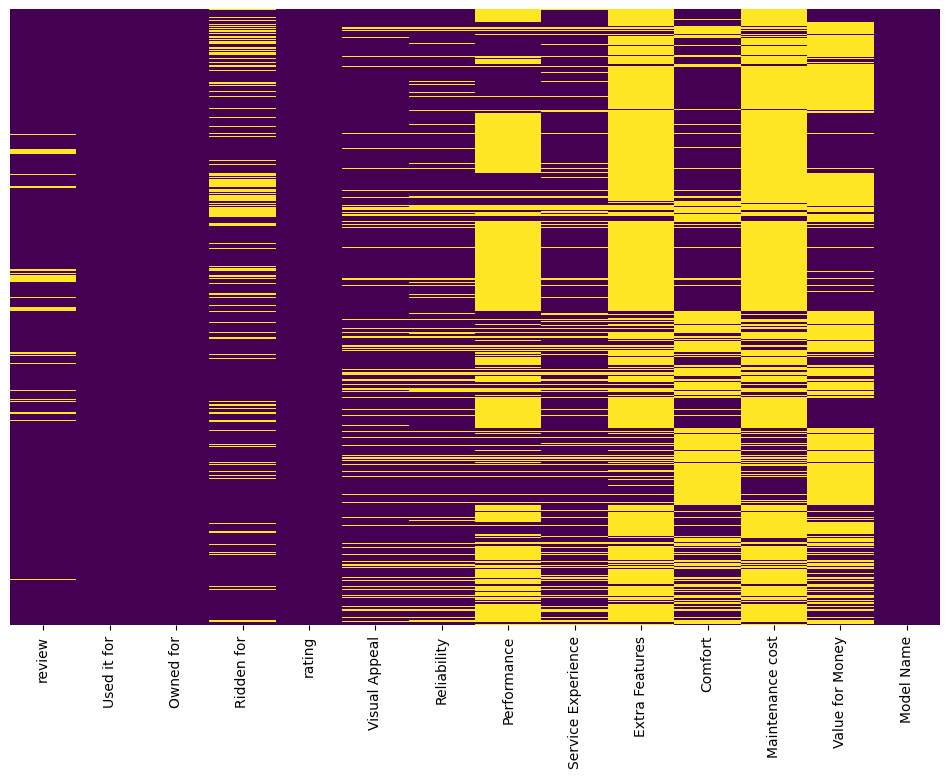

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
data["Used it for"] = data["Used it for"].fillna(data["Used it for"].mode())


In [11]:
data["Ridden for"] = data["Ridden for"].fillna(data["Ridden for"].mode()[0])
data["Visual Appeal"] = data["Visual Appeal"].fillna(data["Visual Appeal"].mode()[0])
data["Reliability"] = data["Reliability"].fillna(data["Reliability"].mode()[0])
data["Performance"] = data["Performance"].fillna(data["Performance"].mode()[0])
data["Service Experience"] = data["Service Experience"].fillna(data["Service Experience"].mode()[0])
data["Extra Features"] = data["Extra Features"].fillna(data["Extra Features"].mode()[0])
data["Comfort"] = data["Comfort"].fillna(data["Comfort"].mode()[0])
data["Maintenance cost"] = data["Maintenance cost"].fillna(data["Maintenance cost"].mode()[0])
data["Value for Money"] = data["Value for Money"].fillna(data["Value for Money"].mode()[0])

In [12]:
data.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,< 5000 kms,1,3.0,4.0,5.0,5.0,1.0,4.0,4.0,1.0,TVS iQube
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,5.0,1.0,1.0,3.0,4.0,3.0,TVS iQube
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,5.0,2.0,1.0,5.0,4.0,2.0,TVS iQube
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,5.0,1.0,1.0,1.0,4.0,1.0,TVS iQube
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,5.0,1.0,1.0,3.0,4.0,2.0,TVS iQube


In [13]:
data.isna().sum()

review                47
Used it for            0
Owned for              0
Ridden for             0
rating                 0
Visual Appeal          0
Reliability            0
Performance            0
Service Experience     0
Extra Features         0
Comfort                0
Maintenance cost       0
Value for Money        0
Model Name             0
dtype: int64

In [14]:
data.drop("review",axis=1,inplace=True)

In [15]:
data.columns

Index(['Used it for', 'Owned for', 'Ridden for', 'rating', 'Visual Appeal',
       'Reliability', 'Performance', 'Service Experience', 'Extra Features',
       'Comfort', 'Maintenance cost', 'Value for Money', 'Model Name'],
      dtype='object')

### Rating of vehicle based on Performance

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


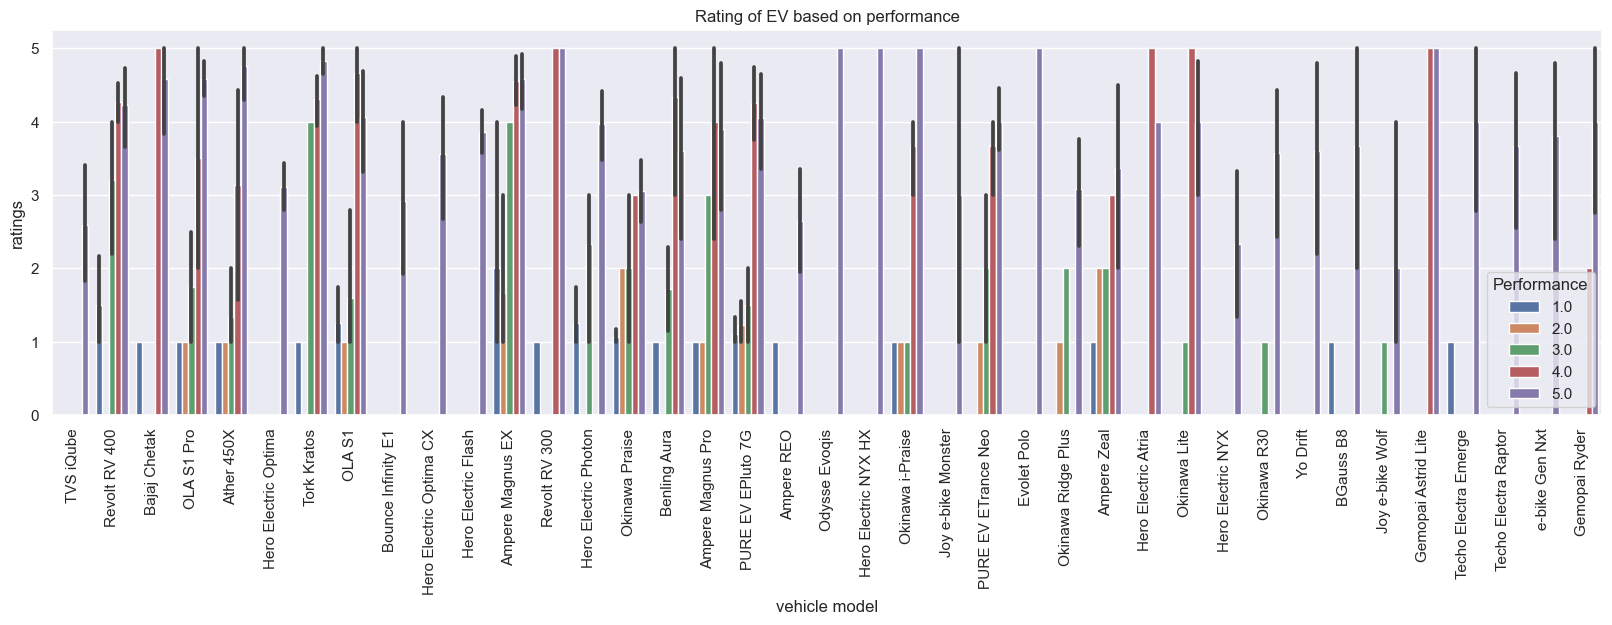

In [16]:

plt.figure(figsize=(20,5))
sns.set_theme(style="darkgrid")
sns.barplot('Model Name', 'rating', data=data, hue=data['Performance'])
plt.title('''Rating of EV based on performance''')
plt.ylabel('ratings')
plt.xlabel('vehicle model')
plt.xticks(rotation = 90)
plt.show()

In [17]:
data["rating"].mean()

3.3637440758293837

### Value for money vehicle 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


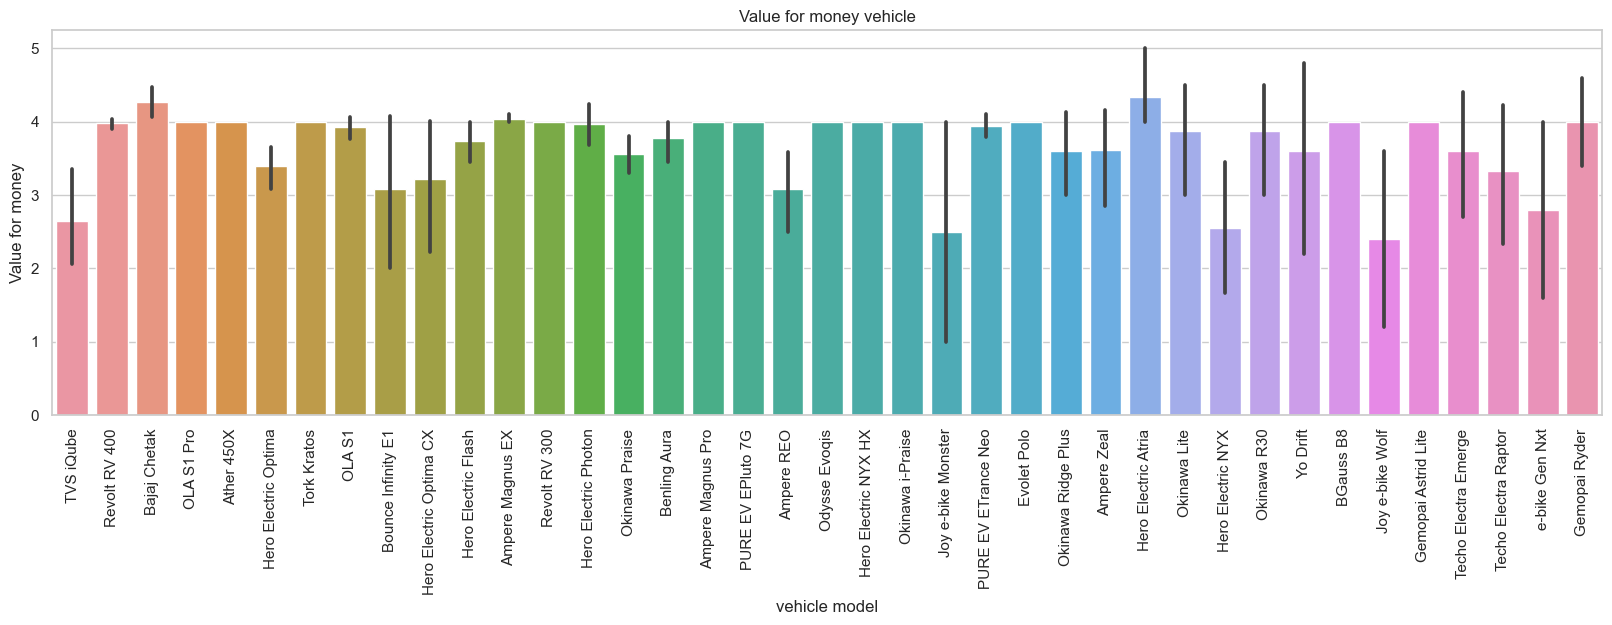

In [18]:
plt.figure(figsize=(20,5))
sns.set_theme(style="whitegrid")
sns.barplot('Model Name','Value for Money', data=data)
plt.title('''Value for money vehicle''')
plt.ylabel('Value for money')
plt.xlabel('vehicle model')
plt.xticks(rotation = 90)
plt.show()

### Maintence cost as per the vehicle model

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


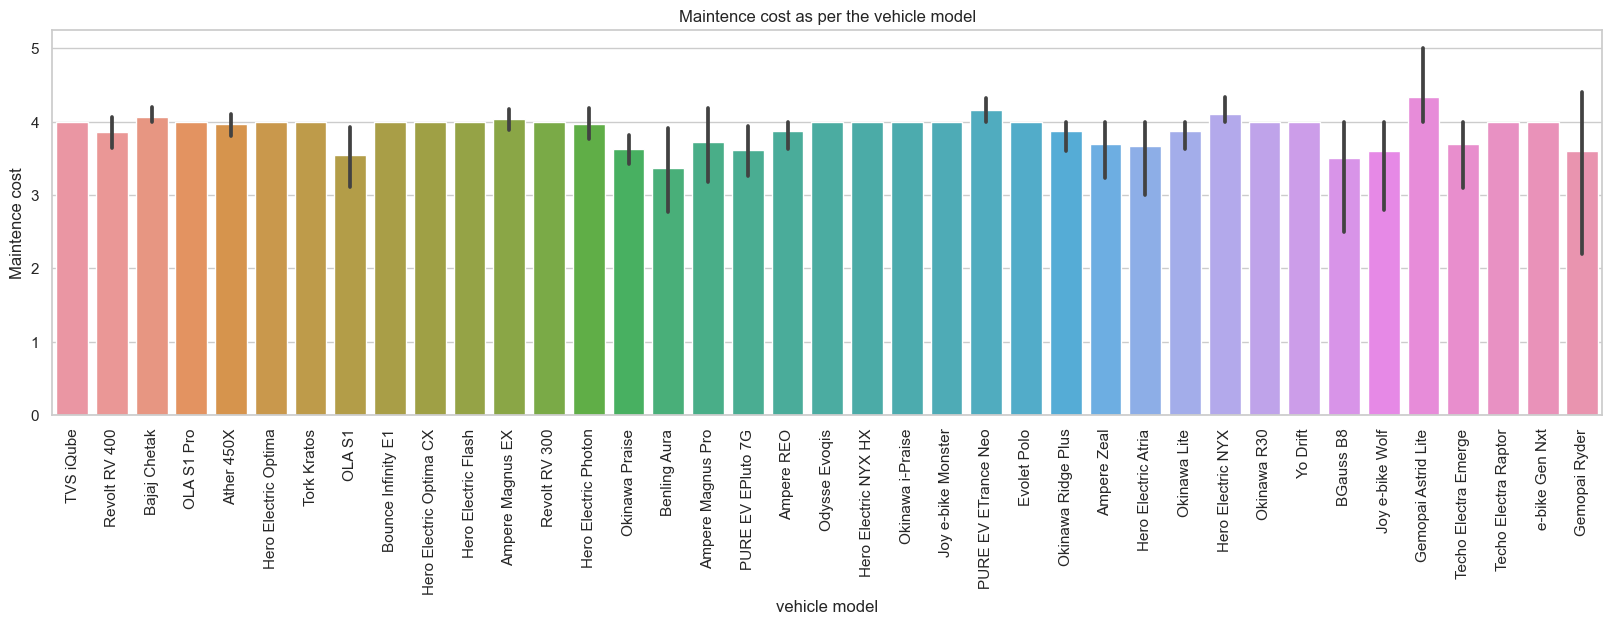

In [19]:
plt.figure(figsize=(20,5))
sns.set_theme(style="whitegrid")
sns.barplot('Model Name', 'Maintenance cost', data=data)
plt.title('''Maintence cost as per the vehicle model''')
plt.ylabel('Maintence cost')
plt.xlabel('vehicle model')
plt.xticks(rotation = 90)
plt.show()


### Vehicle ratings as per the comfort

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


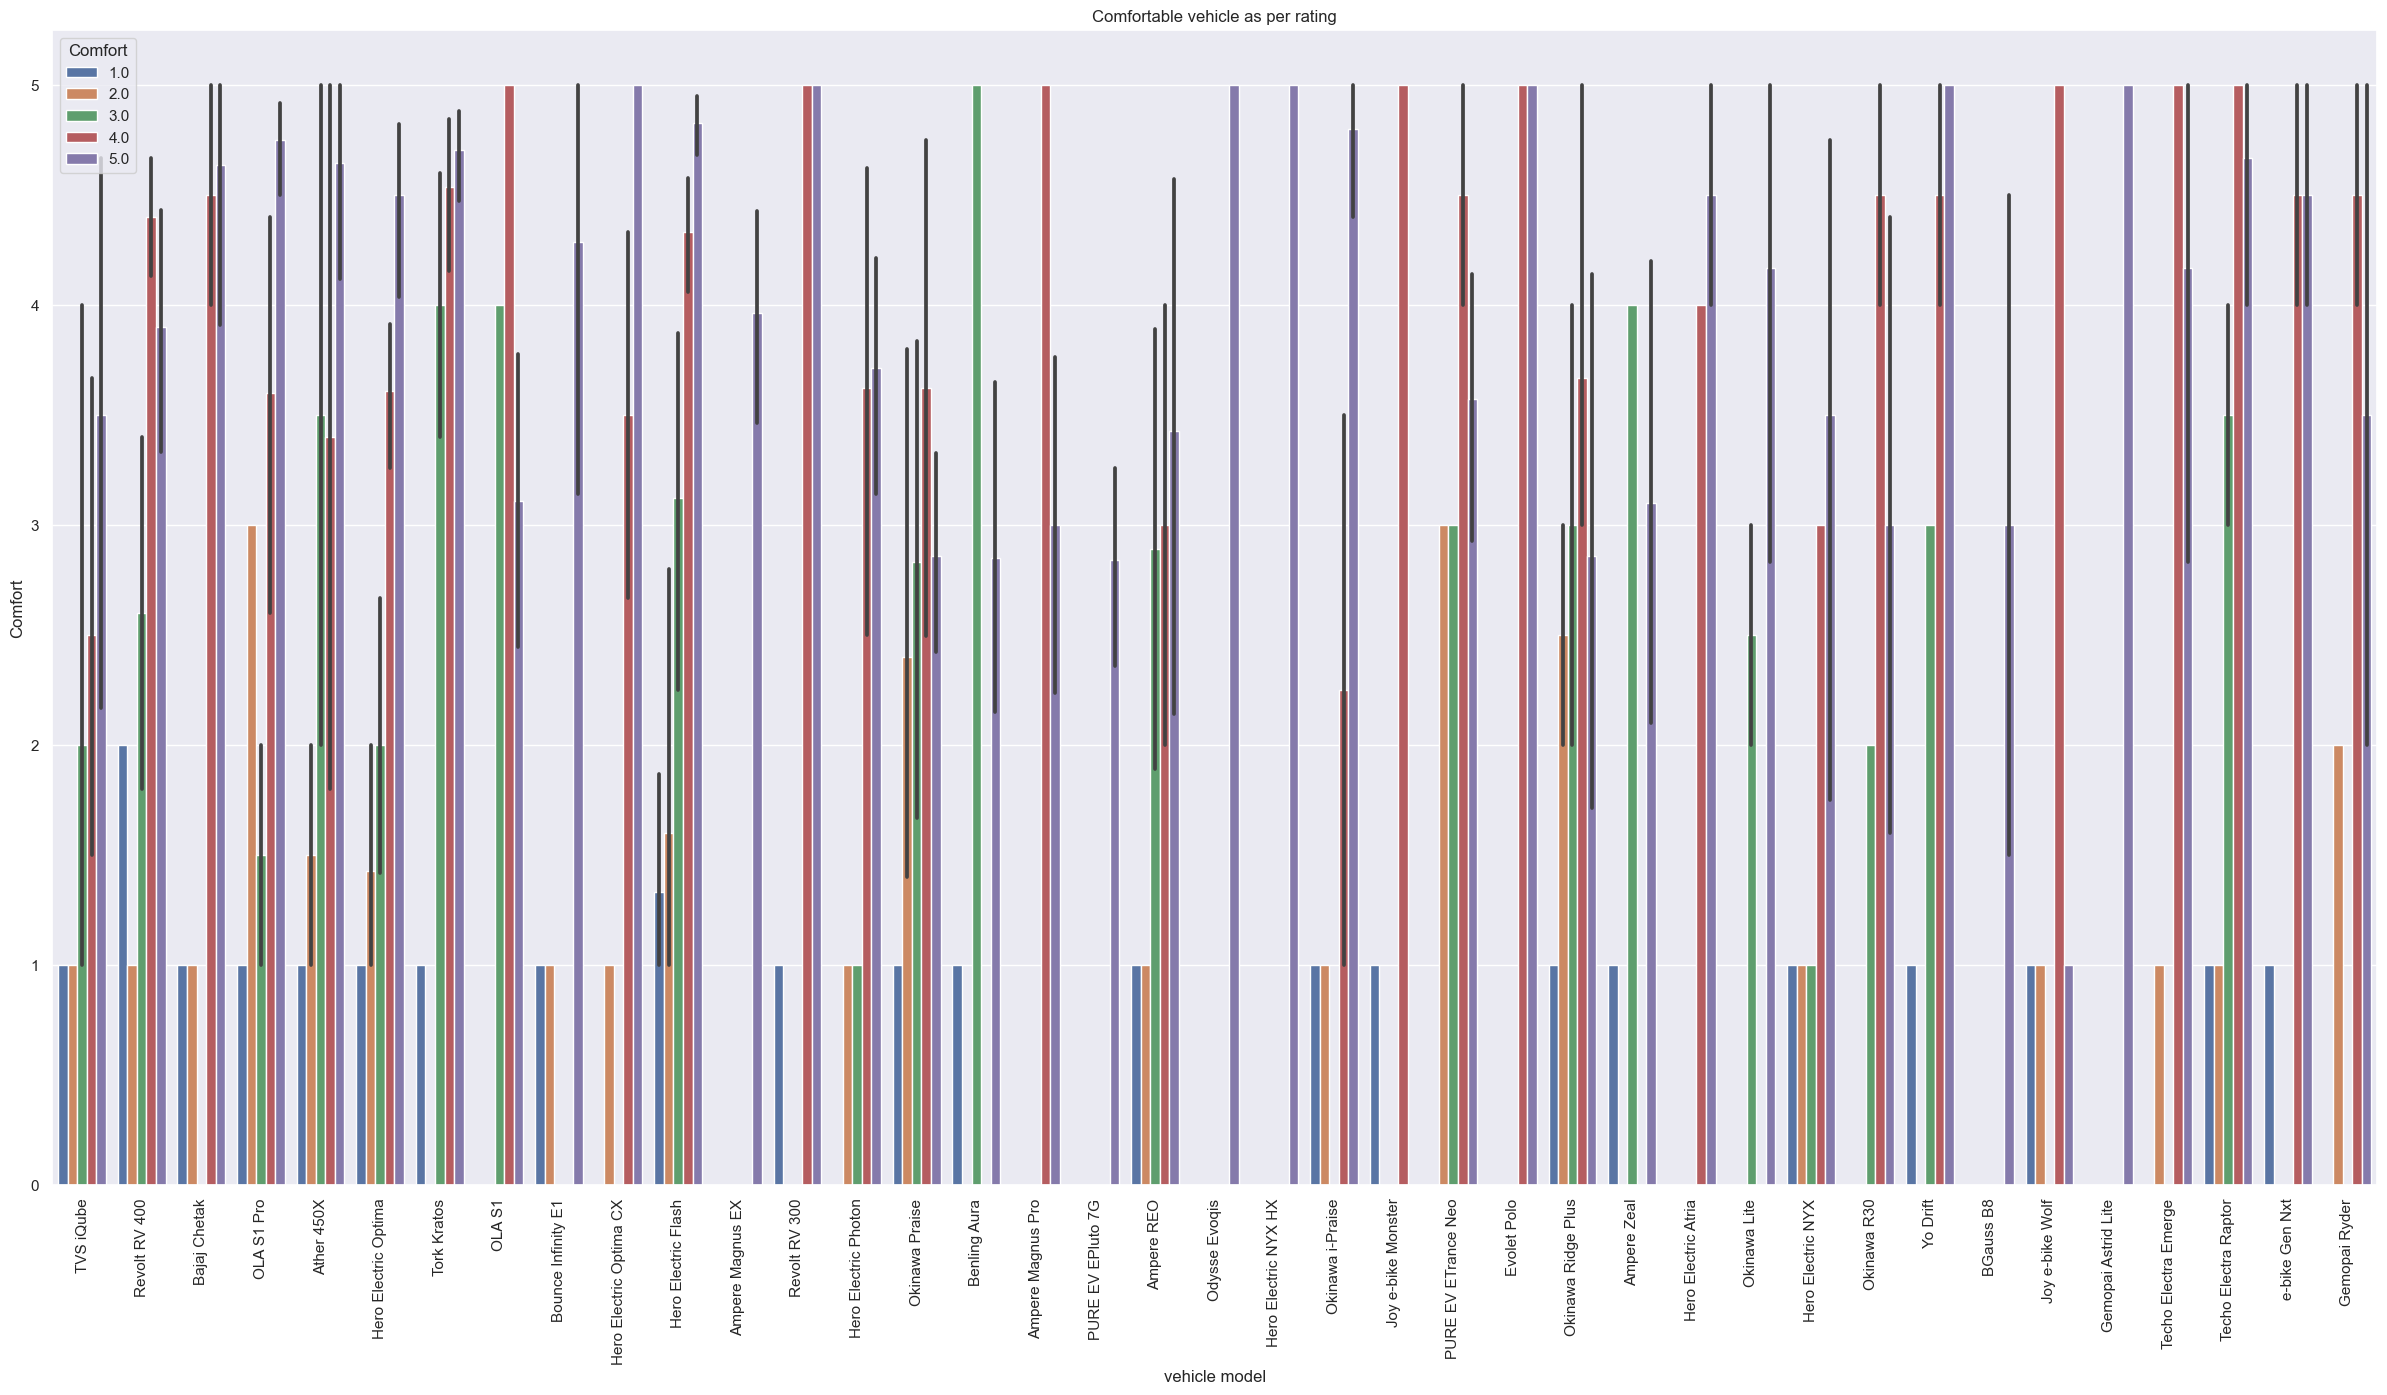

In [20]:
plt.figure(figsize=(30,15))
sns.set_theme(style="darkgrid")
sns.barplot('Model Name', 'rating', data=data,hue=data["Comfort"])
plt.title('''Comfortable vehicle as per rating''')
plt.ylabel('Comfort')
plt.xlabel('vehicle model')
plt.xticks(rotation = 90)
plt.show()


In [21]:
data.columns

Index(['Used it for', 'Owned for', 'Ridden for', 'rating', 'Visual Appeal',
       'Reliability', 'Performance', 'Service Experience', 'Extra Features',
       'Comfort', 'Maintenance cost', 'Value for Money', 'Model Name'],
      dtype='object')

In [22]:
data['Ridden for'].unique()

array(['< 5000 kms', '5000-10000 kms', '> 15000 kms', '10000-15000 kms',
       'Never owned'], dtype=object)

In [23]:
data["Ridden for"].mode()

0    < 5000 kms
Name: Ridden for, dtype: object

In [24]:
data_1= data.loc[data['Ridden for']=='< 5000 kms']
data_2= data.loc[data['Ridden for']=='5000-10000 kms']
data_3= data.loc[data['Ridden for']=='> 15000 kms']
data_4= data.loc[data['Ridden for']=='10000-15000 kms']
data_5= data.loc[data['Ridden for']=='Never owned']

ride_1 = ['Less than 5000']
ride_2 = ['between 5000-10000']
ride_3 = ['more than 15000']
ride_4 = ['Between 10000-15000']
ride_5 = ['Never Owned']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


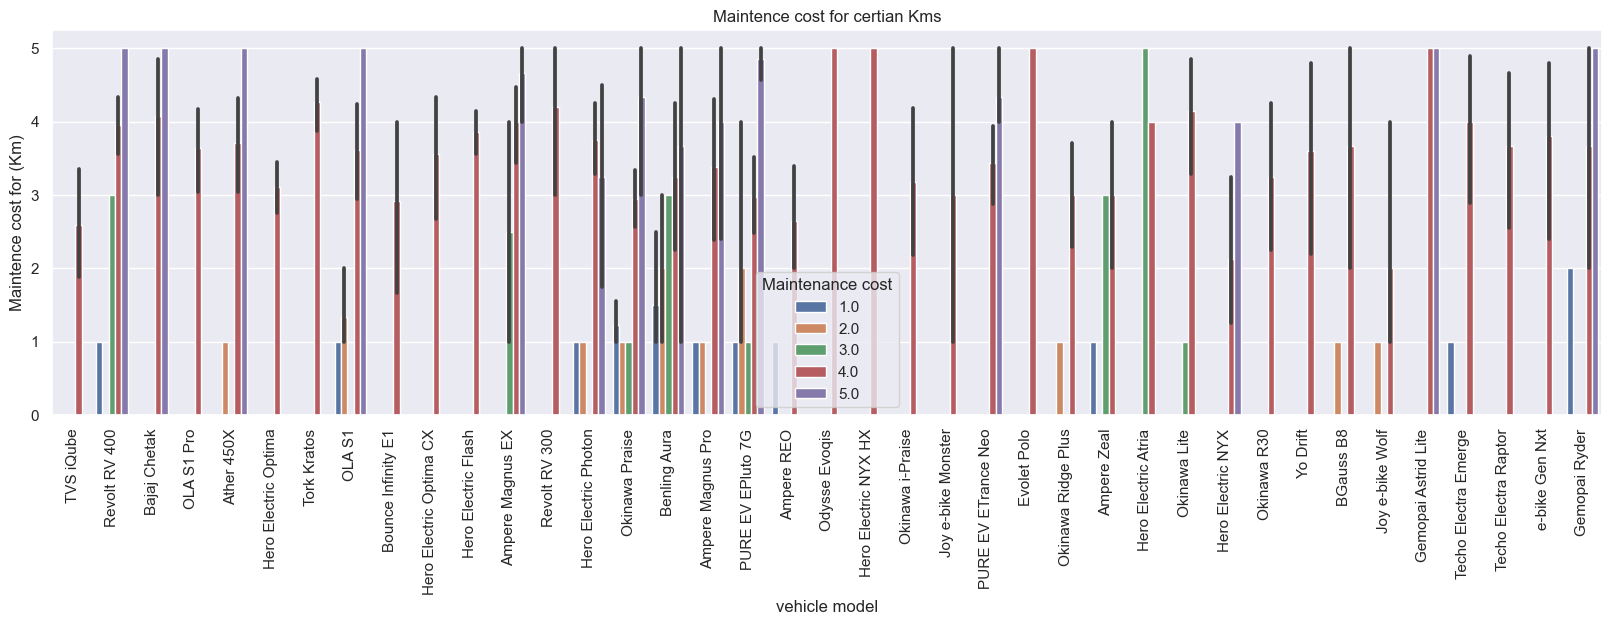

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


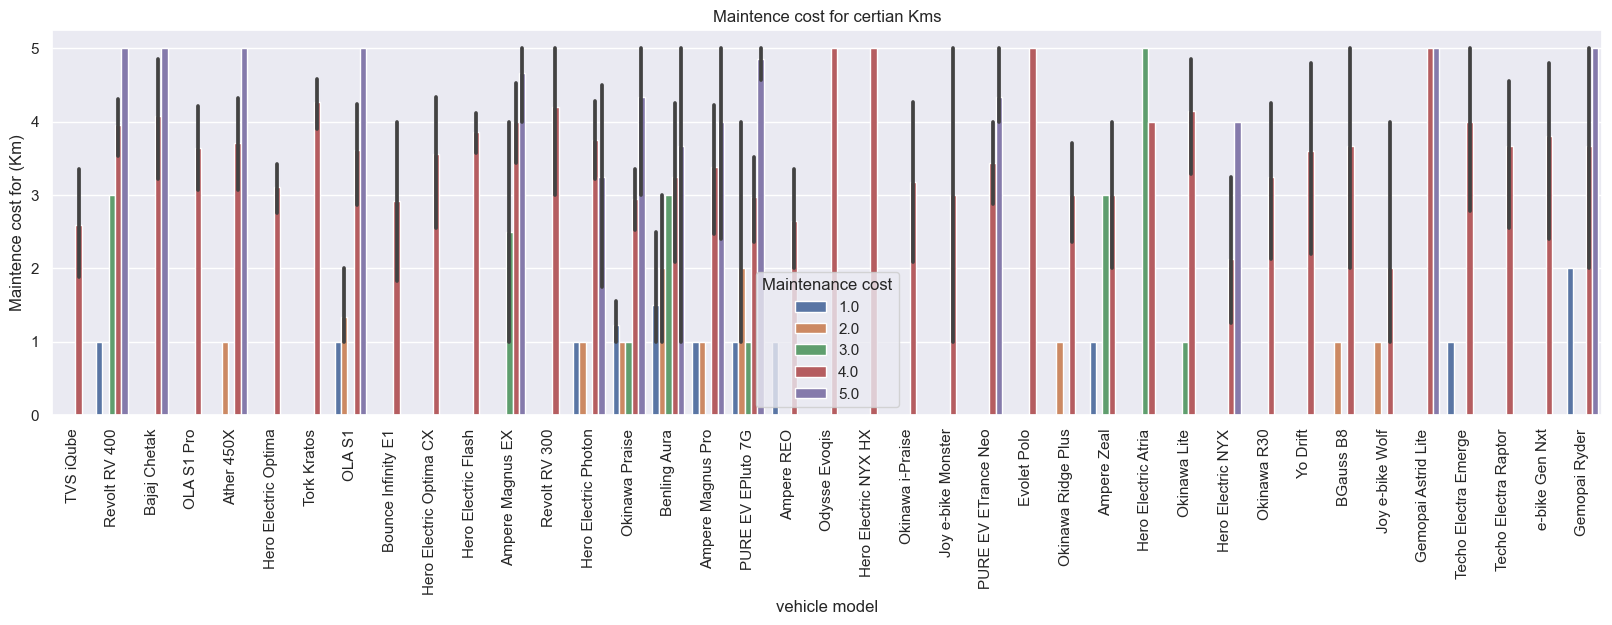

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


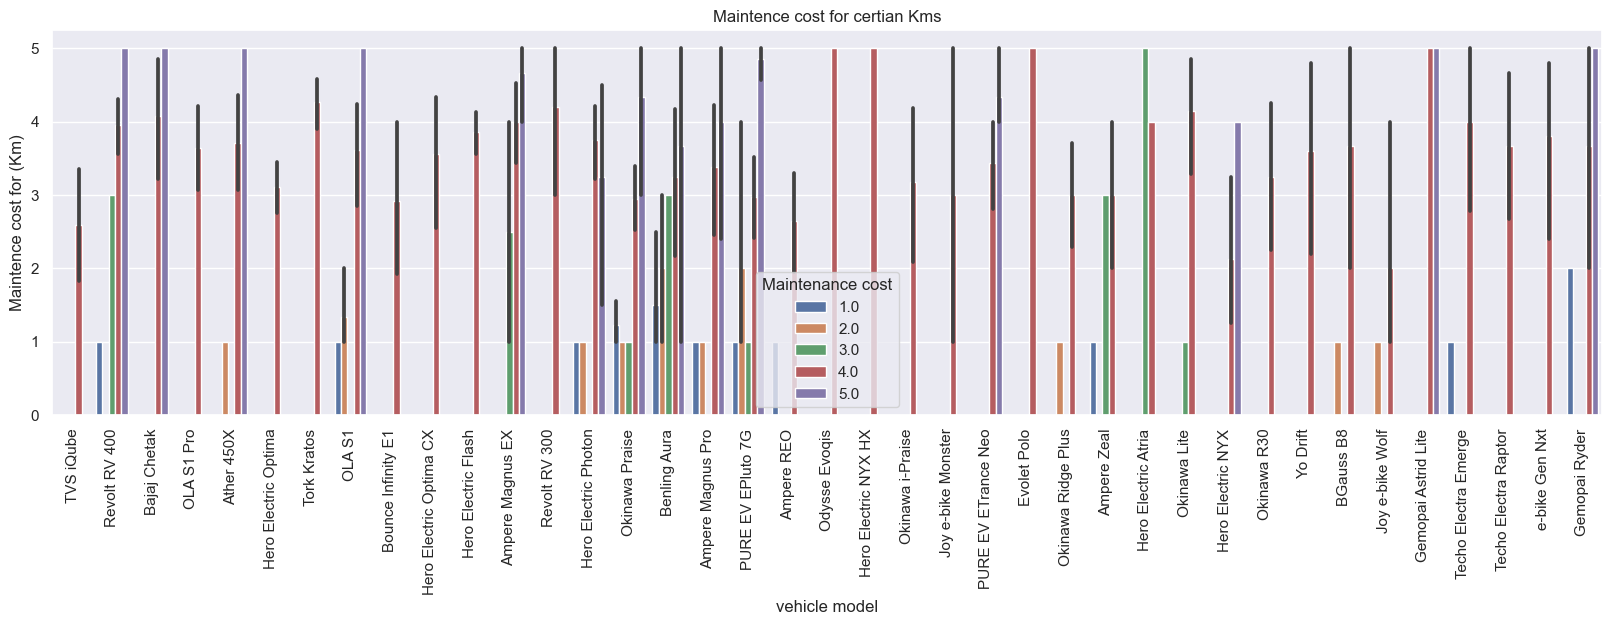

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


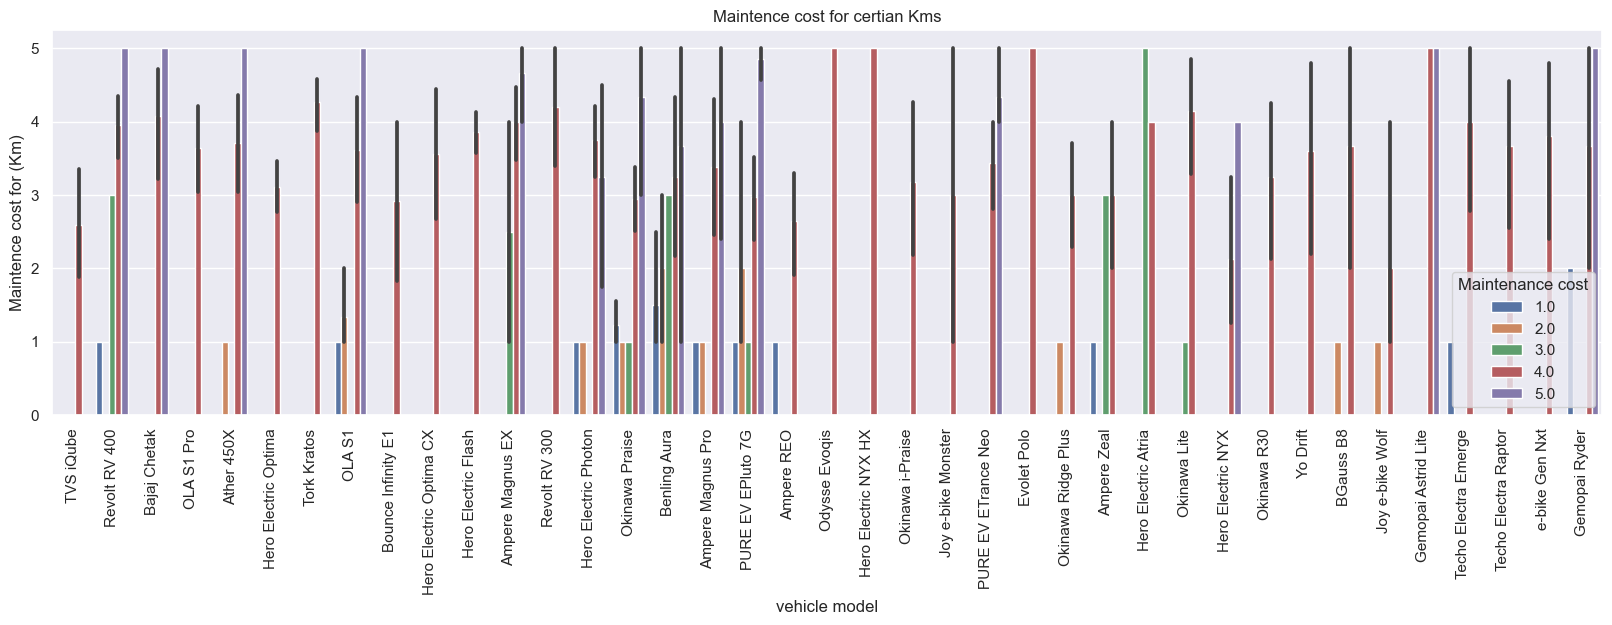

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


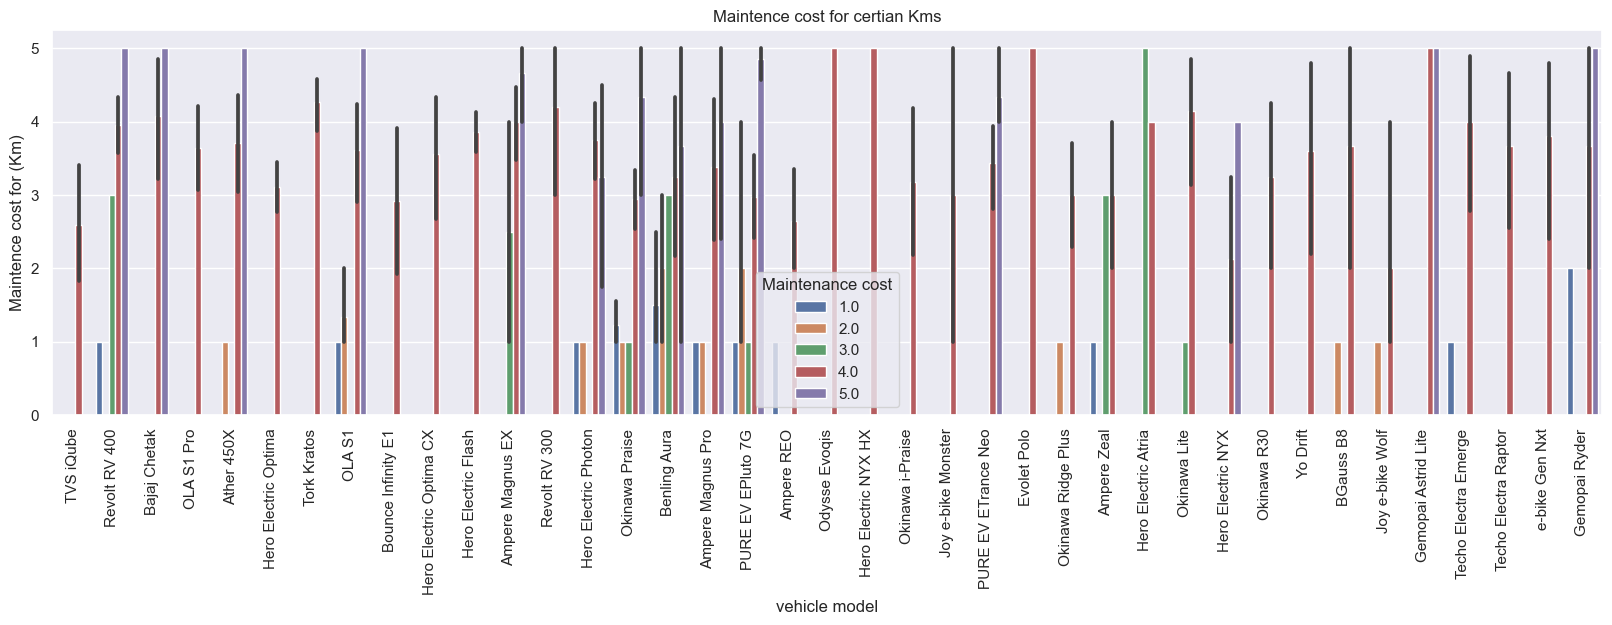

In [25]:
def range(dataframe, ride):
    plt.figure(figsize=(20,5))
    sns.set_theme(style="darkgrid")
    sns.barplot('Model Name','rating', data=data,hue=data["Maintenance cost"] )
    plt.title('''Maintence cost for certian Kms'''.format(ride))
    plt.ylabel('Maintence cost for (Km)')
    plt.xlabel('vehicle model')
    plt.xticks(rotation = 90)
    plt.show()
range(data_1, ride_1)
range(data_2, ride_2)
range(data_3, ride_3)
range(data_4, ride_4)
range(data_5, ride_5)